
# YZV-211E Introduction to Data Science and Engineering


## Homework 4: Building and Evaluating Machine Learning Models

**Fall 2022**<br>
**Instructor:** *Asst. Prof. Dr. Faik Boray TEK* <br>
**Reach out to TA Erhan Bicer for any of your questions (bicer21@itu.edu.tr)**

---



In this assignment, you will be practicing:
* Regression
* Classification
* Clustering
* Evaluating ML models

**Before diving into solving assignment**:
* Use random_state parameter as 0 if the parameter exists to avoid different solutions if the code is re-executed.
* You can add cells within the headers for your code.
* Prefarably, use models within the sklearn. 
* Write your name, surname and student number in the below markdown.
* This is the last homework before the project, thanks for your efforts so far. Keep up the good work, the semester is almost done :)


In [42]:
import numpy as np
np.random.seed(42) # meaning of life: 42

### Submitted by:
Name Surname,StudentNumber

### Import necessary packages

Import packages that you are going to use, do not remove already existing ones.

In [43]:
###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

## Regression

*Recall: In regression task, aim is to make predictions on continous values (e.g. predicting expected income in next month for a company)*

A NASA dataset about average temperature is given. In the dataset, annual difference in average global temperature is given. Your task is to use the data between **1880 and 2010 (inclusive) to train your model** and **make predictions for upcoming years after 2010 (2011-2021)**. **Evaluate your model with actual annual difference for these years**.

In [44]:
df = pd.read_csv("nasa-temperature.txt",sep=",",index_col=0)
df.head()

,Year,Difference
0,1880,-0.16
1,1881,-0.07
2,1882,-0.10
3,1883,-0.17
4,1884,-0.28


### Training-Test Split

Since this is a temporal (time-based) dataset, training-test split should be done carefully. Aim is to use historical data to predict annual difference in upcoming years.
* Use the data between **1880 and 2010 (inclusive) as training set**
* **test set consist of samples after 2010 (2011-2021)**.

In [45]:
data_train = df[df['Year'] <= 2010]
data_test = df[df['Year'] > 2010]

X_train = data_train['Year'].values.reshape(-1, 1)
y_train = data_train['Difference'].values.reshape(-1, 1)
X_test = data_test['Year'].values.reshape(-1, 1)
y_test = data_test['Difference'].values.reshape(-1, 1)

### Apply simple linear regression

* Apply simple linear regression
* Plot the actual values and predictions (plot both train and test predictions together for complete view).
* Using appropriate metrics (at least 2), report how well your regression line fit to both training data and testing data.

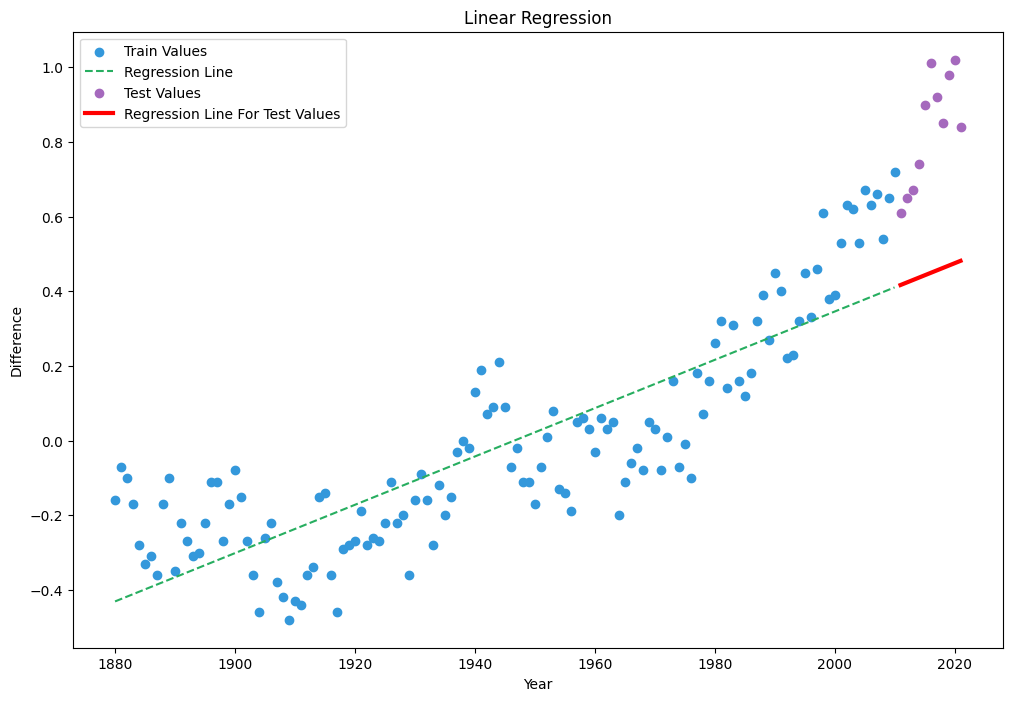

Mean Square Error for test_data :: 0.16525922756777783
Mean Square Error for train_data :: 0.02384643587692537

Mean Absolute Error for test_data :: 0.3865634441893992
Mean Absolute Error for train_data :: 0.12842182245235675

Root Mean Absolute Error for test_data :: 0.40652088208083215
Root Mean Absolute Error for train_data :: 0.1544229124091544



In [46]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

line_model = LinearRegression()
line_model.fit(X_train, y_train)

y_pred = line_model.predict(X_test)
line_regression = line_model.predict(X_train)

fig = plt.subplots(figsize=(12, 8))

plt.scatter(X_train, y_train, color='#3498DB') 
plt.plot(X_train, line_regression, linestyle='dashed', color='#27AE60')

plt.scatter(X_test, y_test, color='#A569BD') 
plt.plot(X_test, y_pred, color='red', linewidth = '3') 

plt.legend(['Train Values', 'Regression Line','Test Values','Regression Line For Test Values'], prop={'size': 10},loc=2)

plt.title('Linear Regression') # adds tittle to the plot
plt.xlabel('Year') # adds label to the x-axis
plt.ylabel('Difference') # adds label to the y-axis
plt.show()

print("Mean Square Error for test_data ::", mean_squared_error(y_test, y_pred))
print("Mean Square Error for train_data ::", mean_squared_error(y_train, line_regression))
print("")
print("Mean Absolute Error for test_data ::", mean_absolute_error(y_test, y_pred))
print("Mean Absolute Error for train_data ::", mean_absolute_error(y_train, line_regression))
print("")
print("Root Mean Absolute Error for test_data ::", mean_squared_error(y_test, y_pred, squared=False))
print("Root Mean Absolute Error for train_data ::", mean_squared_error(y_train, line_regression, squared=False))
print("")

*       The smaller the mean squared error, the closer you are to finding the line of best fit.
*       The smaller the mean absolute error, the closer you are to finding the line of best fit.
*       The smaller the root mean squared error, the closer you are to finding the line of best fit.
*       Test errors are larger than training errors, this is because the model is overfitting the training data.


### Polynomial Regression

* Apply polynomial regression. Decide on optimal degree.
* Plot the actual values and predictions (plot both train and test predictions together for complete view).
* Using appropriate metrics (at least 2), report how well your regression line fit to both training data and testing data.
* Answer Question 1.

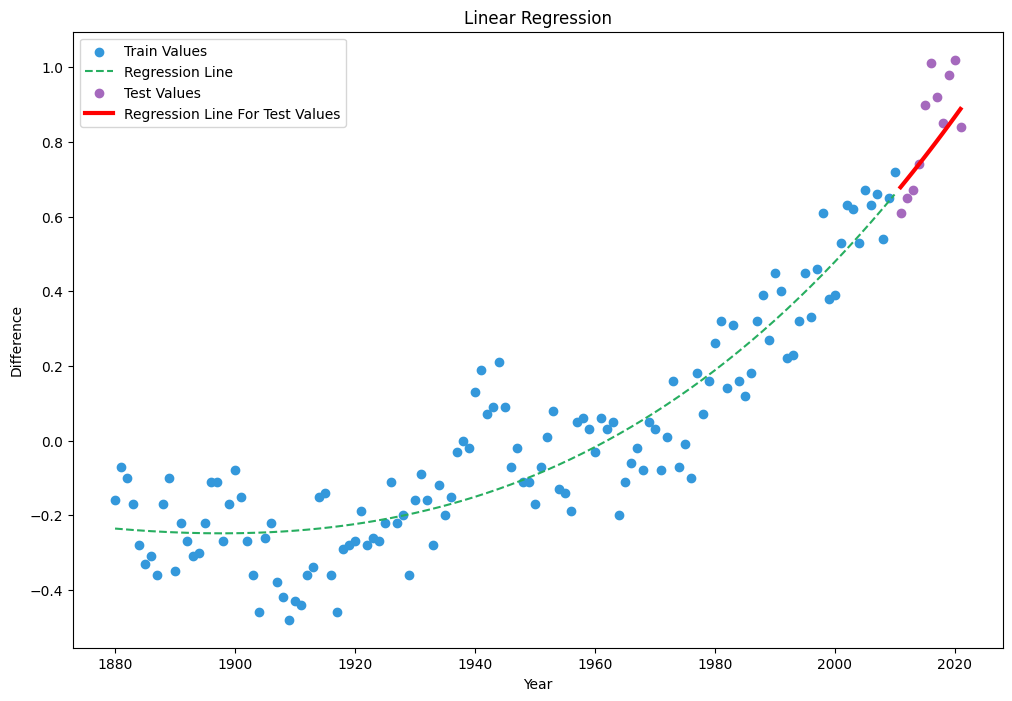

Mean Square Error for test_data :: 0.012872945624875532
Mean Square Error for train_data :: 0.013441175335877159

Mean Absolute Error for test_data :: 0.09292736420276344
Mean Absolute Error for train_data :: 0.09469226244882582

Root Mean Absolute Error for test_data :: 0.11345900415954448
Root Mean Absolute Error for train_data :: 0.11593608297625532



In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn. linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
        
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred = poly_model.predict(X_test_poly)
poly_regression = poly_model.predict(X_train_poly)

fig = plt.subplots(figsize=(12, 8))

plt.scatter(X_train,y_train, color='#3498DB')
plt.plot(X_train, poly_regression, linestyle='dashed', color='#27AE60')

plt.scatter(X_test, y_test, color='#A569BD')
plt.plot(X_test, y_pred, color='red', linewidth = '3')

plt.legend(['Train Values', 'Regression Line','Test Values','Regression Line For Test Values'],prop={'size': 10},loc=2)

plt.title('Linear Regression') # adds tittle to the plot
plt.xlabel('Year') # adds label to the x-axis
plt.ylabel('Difference') # adds label to the y-axis

plt.show()

print("Mean Square Error for test_data ::", mean_squared_error(y_test, y_pred))
print("Mean Square Error for train_data ::", mean_squared_error(y_train, poly_regression))
print("")
print("Mean Absolute Error for test_data ::", mean_absolute_error(y_test, y_pred))
print("Mean Absolute Error for train_data ::", mean_absolute_error(y_train, poly_regression))
print("")
print("Root Mean Absolute Error for test_data ::", mean_squared_error(y_test, y_pred, squared=False))
print("Root Mean Absolute Error for train_data ::", mean_squared_error(y_train, poly_regression, squared=False))
print("")


*       Test error is less than the training error, this means that there is a sampling bias in test. 

### Question 1 
* Which metrics have you chosen? Why?
* Compare the results of polynomial regression with linear regression. Which one is better in terms of evaluation metrics? Which one represents the data better? **Why?**

**Your Answer:**
* Which metrics have you chosen? Why? 
*       Mean Squared Error, Mean Absolute Error and Root Mean Absolute Error. Because these metrics are used to evaluate regression models.
* Compare the results of polynomial regression with linear regression. Which one is better in terms of evaluation metrics? Which one represents the data better? **Why?**
*       Polynomial regression is better in terms of evaluation metrics. Because the values of the metrics are lower. Polynomial regression represents the data better because the values of the metrics are lower.

## Classification

*Recall: In classification, goal is to classify samples (e.g. classifying various flowers such as iris-setosa, iris-versicolour)*

We will be working with breast cancer wisconsin dataset. The breast cancer dataset is a classic binary classification dataset. Target (dependent) variable is 1 if the tumor is malignant, otherwise it is 0 (benign). Independent variables are medical measures of the cancer cell. Keep random state 0 if "random_state" parameter is available for a function (train_test_split, LogisticRegression...)

### Load Dataset: Get X (Independent Variables) and y (Target Dependent Variable)

In [48]:
X,y = load_breast_cancer(return_X_y=True)

### Split Dataset into Training and Testing

Split the data randomly (**using random_state 0, if needed**) into train and test sets with **80% and 20%** sizes respectively.

In [49]:
from sklearn.model_selection import train_test_split

X_train_dgt, X_test_dgt, y_train_dgt, y_test_dgt = train_test_split(X, y, test_size=0.2, random_state=0)

### Apply Logistic Regression
* Perform hyperparameter optimization with **at least 4 different hyperparameter combinations** (4 training and testing). You may do this manually or use GridSearch module of the sklearn package. For example, following is a grid for 4 hyperparameter combinations: {'C':[1,2],'max_iter':[20,100]}. **Answer Question 2 based on this.**
* Report the performance of the best logistic regression model (best performing parameters in the hyperparam. optimization) with appropriate metrics.
* Plot confusion matrix of the predictions and actual values.
* Answer Question 3
* Plot AUC-ROC Curve, Precision-Recall Curve.
* Answer Question 4
* Apply 5-Fold Cross Validation on the **training data**. Report the validation results and performance on the **test set**. Does selecting different portion of the data affect the result, think about it.


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
def warn(*args, **kwargs):
    pass
warnings.warn=warn

clf = GridSearchCV(LogisticRegression(), param_grid = {'C':[1,2],'max_iter':[20,200], 'solver' : ['lbfgs','newton-cg','liblinear','sag','saga']})

log_model = clf.fit(X_train_dgt, y_train_dgt)

y_pred_log_reg = log_model.predict(X_test_dgt)

df_preds = pd.DataFrame({'Actual': y_test_dgt.squeeze(), 'Predicted': y_pred_log_reg.squeeze()})
print(df_preds)

accuracy_score = accuracy_score(y_test_dgt, y_pred_log_reg)
print("Accuracy score       :: ", accuracy_score)

     Actual  Predicted
0         0          0
1         1          1
2         1          1
3         1          1
4         1          1
..      ...        ...
109       0          0
110       1          1
111       0          0
112       0          0
113       1          1

[114 rows x 2 columns]
Accuracy score       ::  0.9473684210526315


### Question 2

Report your observations on how the performance is affected when the parameters change and **why.** So, pick parameters that you can explain the reason behind the effect on the performance.

**Your Answer:**

how the performance is affected when the parameters change and **why.**
*       C: The regularization parameter C controls the trade off between smooth decision boundary and classifying the training points correctly.
*       max_iter: The maximum number of iterations taken for the solvers to converge.
*       solver: Algorithm to use in the optimization problem.
*       I chose 'lbfgs' solver because it is an optimizer in the family of quasi-Newton methods.
*       I chose 'newton-cg' solver because it is a variant of the conjugate gradient method which is fast and efficient for large-scale problems.
*       I chose 'liblinear' solver because it is a good choice for small datasets.
*       I chose 'sag' solver because it is a fast optimizer, especially when we have large datasets with thousands of training samples or more.
*       I chose 'saga' solver because it is a variant of sag algorithm. It also supports non-smooth penalties like 'l1' and 'elasticnet'.

### Question 3

Using confusion matrix, explain the performance of the model briefly.

confusion_matrix_accuracy_score ::  0.9473684210526315


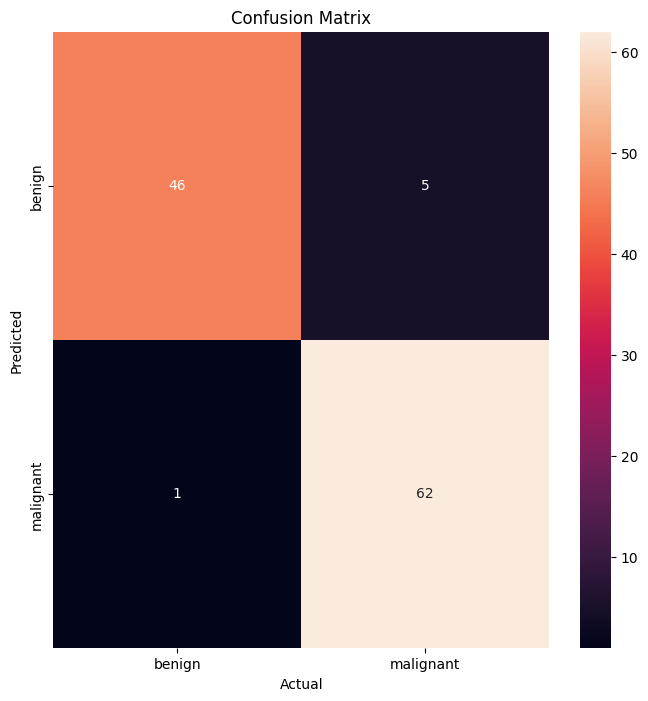

In [51]:
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
import sklearn.metrics as mt

fig, ax = plt.subplots(figsize=(8, 8))

mat = confusion_matrix(y_test_dgt, y_pred_log_reg)

x_axis_labels = ["benign","malignant"] # labels for x-axis
y_axis_labels = ["benign","malignant"] # labels for y-axis

sns.heatmap(mat.T, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot=True, fmt='.2g')

plt.title('Confusion Matrix') # adds tittle to the plot
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

fig.show()

tn, fp, fn, tp = mt.confusion_matrix(y_test_dgt, y_pred_log_reg).ravel()
log_reg_accuracy = (tp + tn) / (tn + fp + fn + tp)

print("confusion_matrix_accuracy_score :: ",log_reg_accuracy)

### Question 4

Examine the curves and explain the performance of the model briefly.

**Your Answer:**

### Apply another classifier that you have chosen
* Report the performance of the model with appropriate metrics (at least 4) on the test data.
* Plot confusion matrix of the predictions and actual values.
* Answer Question 5 and 6.

*You do not need to perform hyperparameter optimization for this section.*

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import sklearn.metrics as mt
clf = KNeighborsClassifier(n_neighbors=5)

log_model = clf.fit(X_train_dgt, y_train_dgt)

y_pred_log_reg = log_model.predict(X_test_dgt)

df_preds = pd.DataFrame({'Actual': y_test_dgt.squeeze(), 'Predicted': y_pred_log_reg.squeeze()})
print(df_preds)

accuracy_score = accuracy_score(y_test_dgt, y_pred_log_reg)
print("Accuracy score       ::", accuracy_score)

f1_score = f1_score(y_test_dgt, y_pred_log_reg)
print("f1_score             ::", f1_score)

precision_score = precision_score(y_test_dgt, y_pred_log_reg)
print("precision_score      ::", precision_score)

recall_score = recall_score(y_test_dgt, y_pred_log_reg)
print("recall_score         ::", recall_score)

tn, fp, fn, tp = mt.confusion_matrix(y_test_dgt, y_pred_log_reg).ravel()
accuracy = (tp + tn) / (tn + fp + fn + tp)

print("confusion_matrix_score :: ", accuracy)

     Actual  Predicted
0         0          0
1         1          1
2         1          1
3         1          0
4         1          1
..      ...        ...
109       0          0
110       1          1
111       0          0
112       0          0
113       1          1

[114 rows x 2 columns]
Accuracy score       :: 0.9385964912280702
f1_score             :: 0.9473684210526316
precision_score      :: 0.9545454545454546
recall_score         :: 0.9402985074626866
confusion_matrix_score ::  0.9385964912280702


### Question 5
Using confusion matrix, explain the performance of the model briefly. Compare the performance of this model with logistic regression model.

confusion_matrix_accuary_score ::  0.9385964912280702
Accuracy score for Logistic Regression ::  0.9473684210526315


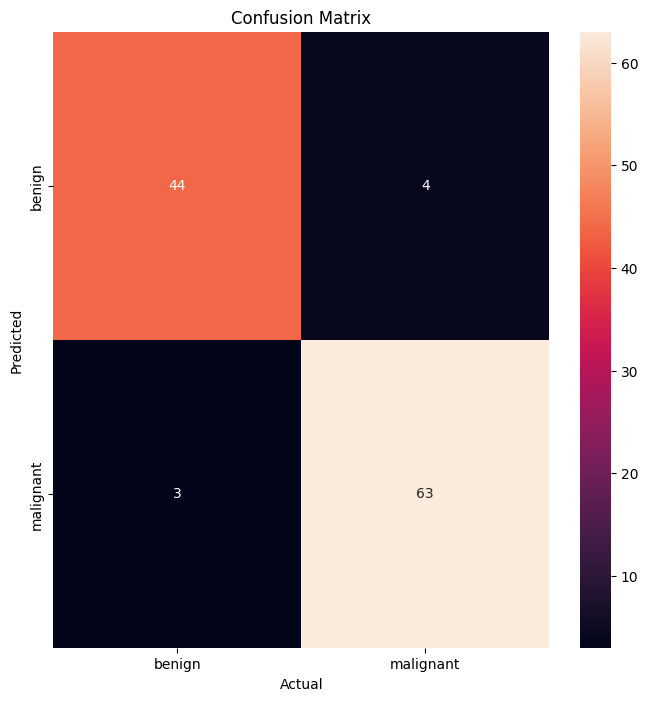

In [53]:
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(figsize=(8, 8))

mat = confusion_matrix(y_test_dgt, y_pred_log_reg)

x_axis_labels = ["benign","malignant"] # labels for x-axis
y_axis_labels = ["benign","malignant"] # labels for y-axis

sns.heatmap(mat.T, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot=True, fmt='.2g')

plt.title('Confusion Matrix') # adds tittle to the plot
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

fig.show()

tn, fp, fn, tp = mt.confusion_matrix(y_test_dgt, y_pred_log_reg).ravel()
Q5_accuracy = (tp + tn) / (tn + fp + fn + tp)

print("confusion_matrix_accuary_score :: ",Q5_accuracy)

print("Accuracy score for Logistic Regression :: ",log_reg_accuracy)

Compare the performance of this model with logistic regression model.
*       The performance of this model is worse than the performance of the logistic regression model.

**Your Answer:**

### Question 6

When does the "accuracy" metric fails to represent the success of our model so that we rely on other metrics? Think about possible scenarios and give a single example and explain briefly.

**Your Answer:**
*   When "accuary" metric fails to represent the success of our model, we rely on other metrics. For example, f1_score, precision, recall, roc_auc_score, etc. Because, when we have imbalanced data, accuracy is not a good metric to evaluate the performance of the model. For example, if we have 90% of the data belonging to one class and 10% of the data belonging to another class, then a model that always predicts the majority class will have an accuracy of 90%. However, this model will not be useful for predicting the minority class. In this case, we need to use other metrics such as f1_score, precision, recall, roc_auc_score, etc.

## Clustering

*Recall: Clustering is an approach of unsupervised learning. In clustering, aim is to split the database into several clusters/groups in where there is no given information of classes. It can be used for anomaly detection, customer segmentation and so on.*

We will be using penguins data that you are familiar from the visualization recitation. Drop the rows that contain null value. You are going to only use following columns (attributes/features):

1. "bill_length_mm"
2. "bill_depth_mm"
3. "flipper_length_mm"
4. "body_mass_g"<br />and "species" (this feature will only be used to compare what we have found with clustering approach)

### Apply K-Means

* Use the dataset with 4 columns as **"bill_length_mm",
"bill_depth_mm",
"flipper_length_mm" and
"body_mass_g".**
* Apply PCA and return 2 principal components. This is done for visualizing purposes. Since dataset does not contain numerous features, information loss due to PCA is negligible.

* Report sums of squared error between centroids and within the clusters (also called total inertia).
* Answer Question 7.

In [54]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

penguins = sns.load_dataset("penguins") # load a toy dataset
penguins.dropna(inplace=True) # drop rows with missing values
penguins = penguins.drop(['island','sex'], axis = 1)

def mapper_binary(x: str) -> int:
    if (x == "Adelie"):
        return 1;
    elif (x == "Gentoo"):
        return 0;
    
penguins['species'] = penguins['species'].apply(mapper_binary)  # apply the mapping function on the column
penguins.dropna(inplace=True) # drop rows with missing values

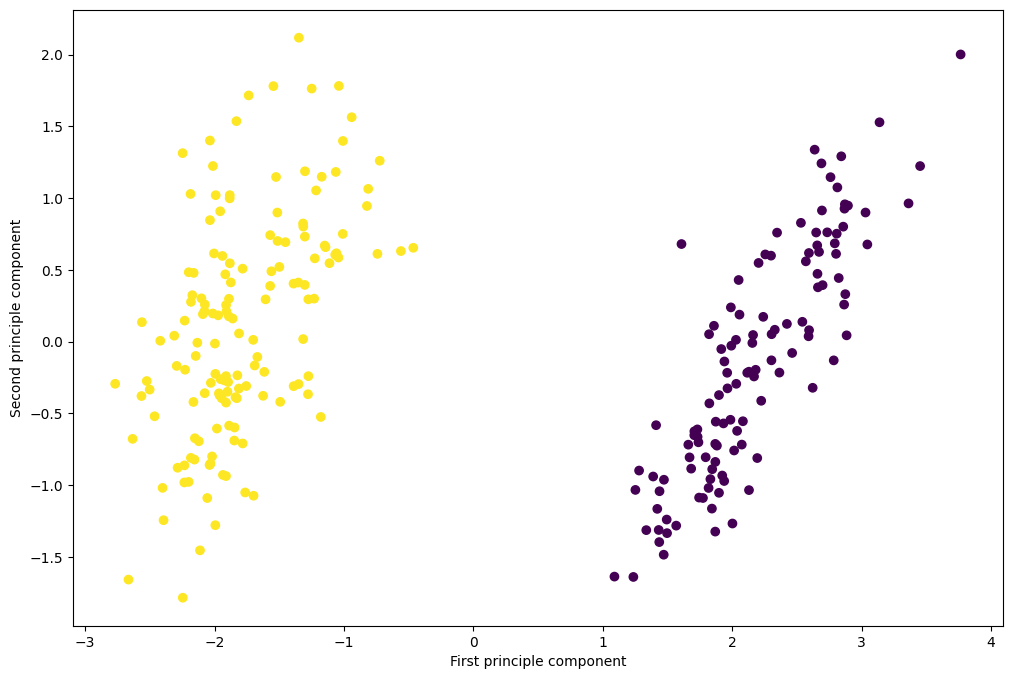

In [55]:
scaler=StandardScaler()
scaler.fit(penguins)
scaled_data=scaler.transform(penguins)
pca=PCA(n_components=2)

pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=penguins['species'])

plt.xlabel('First principle component')
plt.ylabel('Second principle component')

plt.show()

### Plot Clusters

* Cluster the resulting dataset into 3 groups. Plot the scatter graph. 
* Mark 1 sample that can be considered as outlier for each cluster in the graph with a different color.
* Answer Question 6.  

### Question 7

Examine clusters and report what do samples in same cluster have in common? Does your clustering algorithm split the data according to the species?

**Your Answer:**

### Evaluating Clusters

* Report SSE (Sums of squared error, or inertia). Answer Question 8. 

*Hint: You may play with the k parameter to see how inertia changes and that may help you to answer the question.*



*Brief info box for curious ones: There are several metrics for evaluating clusters. Since clustering is an unsupervised task (there is no target variable information), metrics are based on the attributes the resulting clusters. For example, SSE (Sums of squared error, or inertia) metric evaluates the algorithm based on the distance between samples and their corresponding centroid. This metric expects that samples should be near to the centroid. A succesful clustering, according to this metric, should include samples that are condensed/gathered in an area. Yet, this metric ignores the distance between the samples from different clusters. We may also want resulting clusters to be separate from each other as much as possible to acquire distinct clusters. Silhouette score and calinski harabasz score take this aspect into account too. You may check* 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html

### Question 8

If SSE is 0, would you call the clustering successful? In which scenario SSE could be 0?

**Your Answer:**